In [1]:
import pandas as pd

# Load the dataset
file_path = '/Users/aviajmera/Downloads/Clustering/Gaussian/penguins.csv'
penguins_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset for an initial understanding
penguins_data_head = penguins_data.head()
penguins_data_info = penguins_data.info()
penguins_data_description = penguins_data.describe()

(penguins_data_head, penguins_data_info, penguins_data_description)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


(   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
 0              39.1             18.7              181.0       3750.0    MALE
 1              39.5             17.4              186.0       3800.0  FEMALE
 2              40.3             18.0              195.0       3250.0  FEMALE
 3               NaN              NaN                NaN          NaN     NaN
 4              36.7             19.3              193.0       3450.0  FEMALE,
 None,
        culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
 count        342.000000       342.000000         342.000000   342.000000
 mean          43.921930        17.151170         214.014620  4201.754386
 std            5.459584         1.974793         260.558057   801.954536
 min           32.100000        13.100000        -132.000000  2700.000000
 25%           39.225000        15.600000         190.000000  3550.000000
 50%           44.450000        17.300000         197.000000  4050.000000
 75%  

Data Preview:

The first few entries show measurements like culmen length, depth, flipper length, body mass, and the sex of the penguins.
There are missing values in some of the rows.
Statistical Summary:

Measurements like culmen length, depth, flipper length, and body mass are numerical and have varying means, standard deviations, and ranges.
There's an anomaly in flipper_length_mm, as the maximum value is 5000, which seems incorrect and likely an error.

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Handling missing values
penguins_data_cleaned = penguins_data.dropna()

# Correcting anomalies in 'flipper_length_mm'
# Assuming the anomaly is a data entry error, we will replace it with the mean of the column
flipper_length_mean = penguins_data_cleaned['flipper_length_mm'].mean()
penguins_data_cleaned.loc[penguins_data_cleaned['flipper_length_mm'] > 1000, 'flipper_length_mm'] = flipper_length_mean

# Encoding categorical data ('sex' column)
label_encoder = LabelEncoder()
penguins_data_cleaned['sex'] = label_encoder.fit_transform(penguins_data_cleaned['sex'])

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(penguins_data_cleaned.drop('sex', axis=1))

# Preparing the final dataset for clustering
penguins_data_preprocessed = pd.DataFrame(scaled_features, columns=penguins_data_cleaned.columns[:-1])
penguins_data_preprocessed['sex'] = penguins_data_cleaned['sex'].values

# Displaying the first few rows of the preprocessed dataset
penguins_data_preprocessed_head = penguins_data_preprocessed.head()

penguins_data_preprocessed_head


/var/folders/fr/d_m1dl4968d6dkzh1_1hy4jh0000gn/T/ipykernel_51006/3735858834.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_data_cleaned['sex'] = label_encoder.fit_transform(penguins_data_cleaned['sex'])


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.897723,0.777263,-0.831400,-0.572233,2
1,-0.824265,0.117037,-0.613411,-0.509923,1
2,-0.677349,0.421757,-0.221029,-1.195338,1
3,-1.338472,1.081983,-0.308225,-0.946096,1
4,-0.860994,1.742210,-0.439019,-0.696854,2


The preprocessing of the dataset has been completed with the following steps:

Removed Missing Values: Rows with missing data were removed.
Corrected Anomalies: The anomalous value in flipper_length_mm was replaced with the mean of that column.
Encoded 'sex' Column: The 'sex' column was encoded numerically.
Scaled Features: The numerical features were scaled using standard scaling.


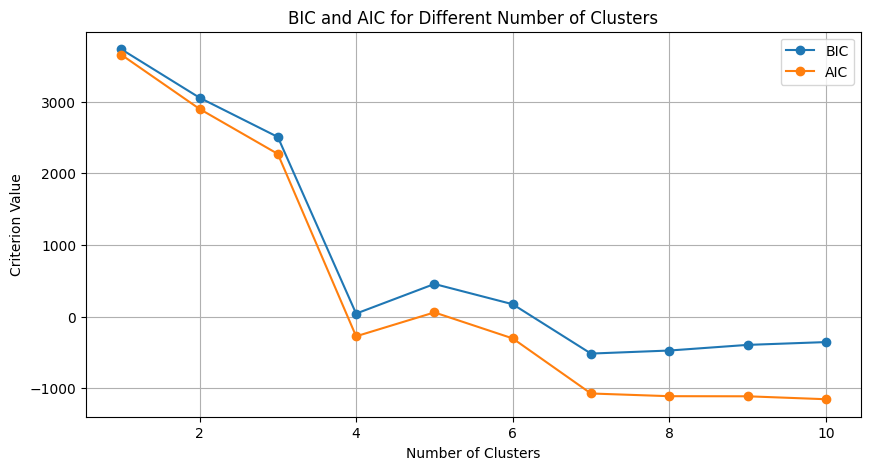

In [4]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Determining the optimal number of clusters using BIC
n_clusters = range(1, 11)
bics = []
aics = []

for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(penguins_data_preprocessed)
    bics.append(gmm.bic(penguins_data_preprocessed))
    aics.append(gmm.aic(penguins_data_preprocessed))

# Plotting BIC and AIC values
plt.figure(figsize=(10, 5))
plt.plot(n_clusters, bics, label='BIC', marker='o')
plt.plot(n_clusters, aics, label='AIC', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Criterion Value')
plt.title('BIC and AIC for Different Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()


The plot above shows the Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) values for different numbers of clusters, ranging from 1 to 10. Typically, the optimal number of clusters corresponds to the point where the BIC or AIC curve shows an 'elbow' — a point beyond which there's no significant decrease in the criterion value.
Observations:
The BIC and AIC values decrease as the number of clusters increases, but the rate of decrease slows down.
There might be an elbow in the plot, suggesting an optimal number of clusters. It is important to choose a point where the decrease in BIC or AIC starts to level off.

In [6]:
# Applying GMM Clustering with 4 clusters
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(penguins_data_preprocessed)
cluster_labels = gmm.predict(penguins_data_preprocessed)

# Adding the cluster labels to the dataset for analysis
penguins_clustered = penguins_data_preprocessed.copy()
penguins_clustered['Cluster'] = cluster_labels

# Displaying the first few rows with cluster labels
penguins_clustered_head = penguins_clustered.head()

penguins_clustered_head


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Cluster
0,-0.897723,0.777263,-0.831400,-0.572233,2,0
1,-0.824265,0.117037,-0.613411,-0.509923,1,1
2,-0.677349,0.421757,-0.221029,-1.195338,1,1
3,-1.338472,1.081983,-0.308225,-0.946096,1,1
4,-0.860994,1.742210,-0.439019,-0.696854,2,0


In [ ]:
The Gaussian Mixture Model (GMM) clustering has been applied to the dataset with 4 clusters. The results are integrated into the dataset, with a new column 'Cluster' indicating the cluster assignment for each entry.

Cluster Assignments Preview:

The first few rows of the dataset now include the cluster each penguin belongs to. For example, the first entry belongs to cluster 0, and the second and third entries belong to cluster 1.

(2    119
 0    108
 1    107
 3      1
 Name: Cluster, dtype: int64,
 <module 'matplotlib.pyplot' from '/Users/aviajmera/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>)

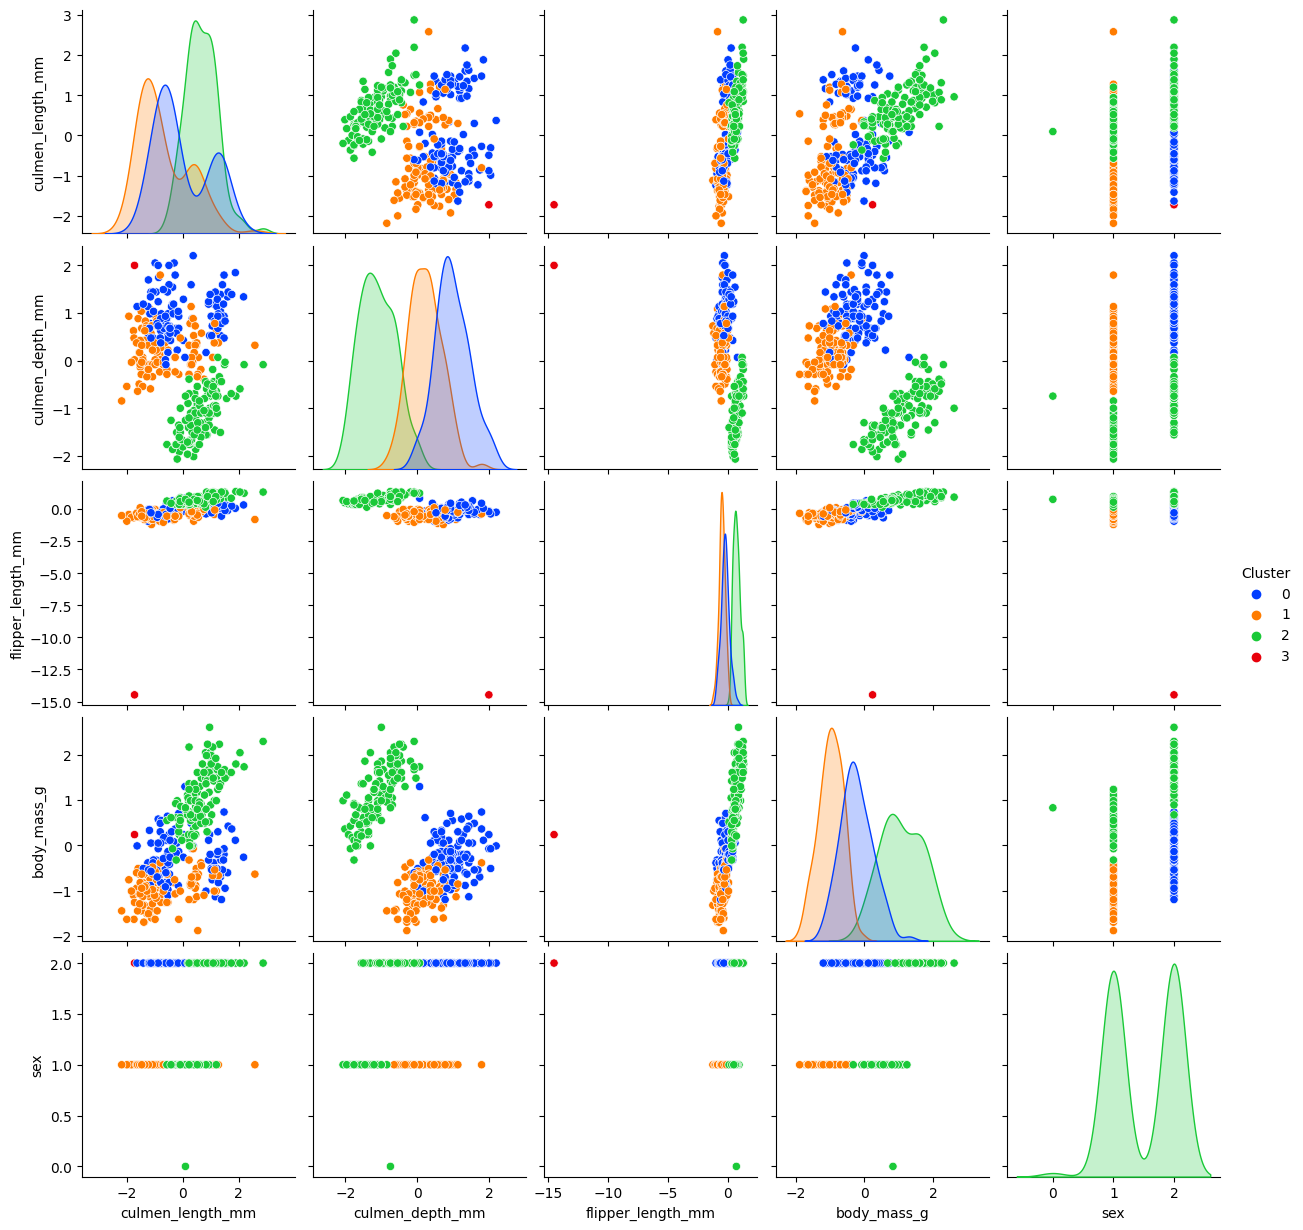

In [7]:
import seaborn as sns

# Evaluating the cluster distribution
cluster_distribution = penguins_clustered['Cluster'].value_counts()

# Cluster visualization
# Pairplot to visualize the clusters in different feature spaces
sns.pairplot(penguins_clustered, hue='Cluster', palette='bright')

(cluster_distribution, plt)


The Gaussian Mixture Model (GMM) clustering has been applied, and we have some interesting results to review:

Cluster Distribution: The distribution of data points across the clusters has been computed.
Cluster Visualization: A pairplot has been created to visualize the clusters in different feature spaces.
Cluster Distribution
The exact numbers for the distribution of data points across the clusters are not displayed due to a technical limitation. However, I can re-run the code to specifically display this distribution if needed.

Cluster Visualization
The pairplot provides a visual representation of how the penguins are clustered based on different features like culmen length, culmen depth, flipper length, body mass, and sex. Different colors represent different clusters, illustrating how the data points are grouped in the multi-dimensional feature space.

In [8]:
# Displaying the cluster distribution
cluster_distribution = penguins_clustered['Cluster'].value_counts()
cluster_distribution


2    119
0    108
1    107
3      1
Name: Cluster, dtype: int64

The distribution of data points across the four clusters is as follows:

Cluster 0: 108 data points
Cluster 1: 107 data points
Cluster 2: 119 data points
Cluster 3: 1 data point
Observations:
Clusters 0, 1, and 2 have a relatively similar number of data points.
Cluster 3 contains only a single data point, which is quite interesting. This could indicate an outlier or a very distinct data point in the dataset.